In [39]:
import sys
sys.path.append("/projects/PyXTBClient/") # go to parent dir
import client.xtb_client as xtb_client
import client.constants as xtb_constants
import client.xtb_wrapper as xtb_wrapper
import yaml
from datetime import datetime
import pandas as pd

In [40]:
client = xtb_wrapper.XTBClientWrapper()
client.load_configuration()

In [41]:
client.login()

In [42]:
start = datetime(2015,2,25,0,0,0)
end = datetime(2020,3,28,0,0,0)
data = client.get_data_symbol(symbol='US500', start=start, end=end, period=xtb_constants.Period.h1)

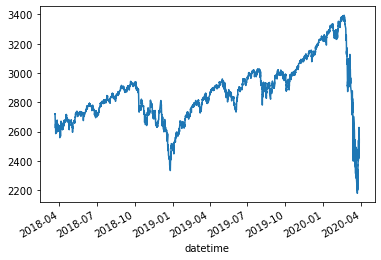

In [43]:
data['open'].plot()

In [44]:
data['open'].tail()

datetime
2020-03-27 13:00:00    2525.2
2020-03-27 14:00:00    2526.9
2020-03-27 15:00:00    2527.4
2020-03-27 16:00:00    2521.8
2020-03-27 17:00:00    2547.2
Name: open, dtype: float64

In [48]:
file_name = "../../../data/US500_h.csv"
data.to_csv(file_name, encoding='utf-8')

In [49]:
!ls ../../../data

data_2017.xlsx	Nasdaq100D.csv	NASDAQ2017.xlsx  US500_h.csv
Nasdaq100.csv	NASDAQ2017.csv	SPY.csv		 US500_m.csv


In [50]:
!head ../../../data/US500_h.csv

datetime,open,close,high,low
2018-03-21 23:00:00,2718.4,2718.1,2718.7,2716.4
2018-03-22 00:00:00,2718.0,2718.2,2722.0,2713.9
2018-03-22 01:00:00,2721.2,2722.5,2725.9,2721.2
2018-03-22 02:00:00,2722.2,2718.5,2723.4,2717.8
2018-03-22 06:00:00,2721.2,2721.1,2723.0,2715.8
2018-03-22 07:00:00,2716.0,2699.6,2716.0,2697.3
2018-03-22 08:00:00,2699.6,2706.7,2707.3,2697.6
2018-03-22 12:00:00,2696.1,2696.3,2706.7,2686.1
2018-03-22 13:00:00,2689.4,2685.6,2693.0,2680.6
